This is to produce a position/velocity plot for B Stars and Dupont

In [17]:
###Import usual things
import numpy as np

import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack

from uncertainties import ufloat

import matplotlib
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 24}) #make plots more readable

import MagellanicStream as ms
import astropy.units as u
from astropy.coordinates import SkyCoord
from uncertainties import ufloat

import warnings
warnings.filterwarnings('ignore')

In [18]:
###Import data
bstpath = '/Users/joshpovick/Desktop/Research/fits/bstars.fits' #original icr stars fits
duppath = '/Users/joshpovick/Desktop/Research/fits/final_dupont_oct09.fits' #original dupont stars
lmcpath = '/Users/joshpovick/Desktop/Research/fits/figure_data_bstars/icstars_lmc_vlsrmlon_lines.fits' #lmc velocity
msvpath = '/Users/joshpovick/Desktop/Research/fits/figure_data_bstars/icstars_hivlsrmlon_lines.fits' #ms velocity
bacpath = '/Users/joshpovick/Desktop/Research/fits/figure_data_bstars/icstars_hivlsrmlon.fits' #HI background

bstars = fits.getdata(bstpath,1)
dupont = fits.getdata(duppath,1)
backgd = fits.getdata(bacpath,1)
lmcvel = fits.getdata(lmcpath,1)
msvelo = fits.getdata(msvpath,1)

In [19]:
#Convert Coordinates in original fits files from ra and dec to MS coordinates
lmsb = []
lmsd = []

for i in range(len(bstars)):
    c_icrs = SkyCoord(ra=bstars['RA'][i]*u.degree, dec=bstars['DEC'][i]*u.degree)
    c_ms = c_icrs.transform_to(ms.MagellanicStream)
    ms_lb,ms_bb = c_ms.MSLongitude.degree, c_ms.MSLatitude.degree
    ms_lb = ms_lb-360
    lmsb.append(ms_lb)
    
for j in range(len(dupont)):
    c_icrs = SkyCoord(ra=dupont['RA'][j]*u.degree, dec=dupont['DEC'][j]*u.degree)
    c_ms = c_icrs.transform_to(ms.MagellanicStream)
    ms_ld,ms_bd = c_ms.MSLongitude.degree, c_ms.MSLatitude.degree
    ms_ld = ms_ld-360
    lmsd.append(ms_ld)
    
#print(lmsb)
#print(lmsd)

In [82]:
print(cvel)


[272.2046  237.02373]


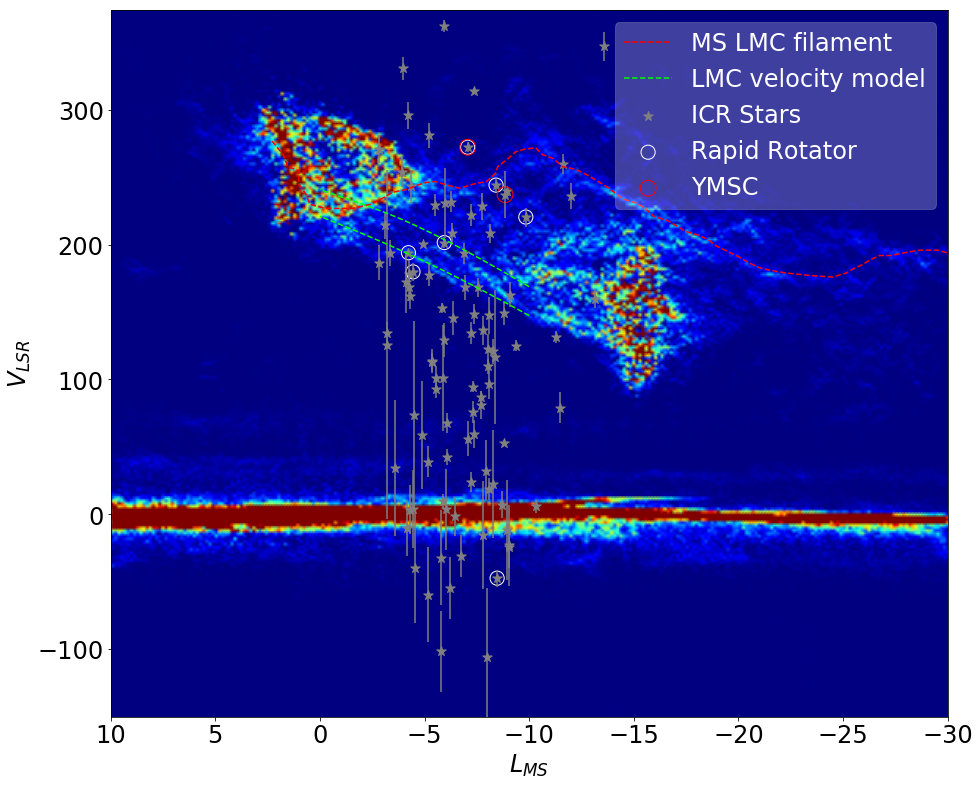

In [84]:
import matplotlib.colors as colors

#all stars
pos = np.append(lmsb,lmsd)
vel = np.append(bstars['VLSR'],dupont['VLSR'])
errs = np.append(bstars['VERR'],dupont['VERR'])

#rapid rotators
raps = np.where(bstars['VSINI']>=40)
rpos = pos[raps]
rvel = vel[raps]

#candidate young stars
canb = np.where(bstars['NAME']=='DI1507')
cand = np.where(dupont['NAME']=='DI1450')
cpos = np.append(lmsb[np.squeeze(canb)],lmsd[np.squeeze(cand)])
cvel = np.append(bstars[canb]['VLSR'],dupont[cand]['VLSR'])

xarr,yarr=np.meshgrid(backgd['XARR'][0],backgd['YARR'][0])
z=backgd['IM'][0]

plt.figure(figsize=(15,13))
plt.xlim(-30,10)
plt.ylim(-150,374)
plt.gca().invert_xaxis()
pcm = plt.pcolormesh(xarr, yarr, z, cmap='jet',shading='gouraud')
plt.plot(msvelo[0][0],msvelo[0][1],'r--',label='MS LMC filament')
plt.plot(lmcvel[0][0],lmcvel[0][1],c='lime',linestyle='dashed',label='LMC velocity model')
plt.plot(lmcvel[0][2],lmcvel[0][3],c='lime',linestyle='dashed')
plt.scatter(pos,vel,c='grey',marker='*',s=100,label='ICR Stars')
plt.scatter(rpos,rvel,facecolors='none',edgecolors='w',s=200,label='Rapid Rotator')
plt.scatter(cpos,cvel,facecolors='none',edgecolors='r',s=250,label='YMSC')
plt.errorbar(pos,vel,errs,linestyle='',c='grey')
plt.ylabel(r'$V_{LSR}$')
plt.xlabel(r'$L_{MS}$')
leg = plt.legend(framealpha = 0.25, loc = 'upper right')
for text in leg.get_texts():
    plt.setp(text, color = 'w')
plt.savefig('velopos.pdf',bbox_inches='tight')
plt.show()

In [42]:
np.shape(z)

(263, 268)